# Задание 3. Линейные методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для метода опорных векторов (SVM) настроить параметры: *гиперпараметр регуляризации C*, *ядро*.
5. Доп. балл: найти реализацию метода стохастического градиента (SG), исследовать им свою выборку.
6. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Метод опорных векторов](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9C.D0.B5.D1.82.D0.BE.D0.B4_.D0.BE.D0.BF.D0.BE.D1.80.D0.BD.D1.8B.D1.85_.D0.B2.D0.B5.D0.BA.D1.82.D0.BE.D1.80.D0.BE.D0.B2).

## Выполнил студент

ФИО Давыдов Алексей Михайлович

Группа Б9119-02.03.03техпро

## Выборка данных < Milk Quality Prediction >

* Ссылка на выборку: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
* Описание выборки: Оценка качества молока. Этот набор данных состоит из 7 независимых переменных, т. е. pH, температуры, вкуса, запаха, жира, мутности и цвета. Обычно от этих параметров зависит сорт или качество молока. Эти параметры играют жизненно важную роль в прогнозном анализе молока.
* Количество классов: 3
* Количество признаков: 7
* Типы признаков: pH - float, остальные - int
* Количество объектов: 1059

## Библиотеки

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
from scipy.spatial.distance import cdist
from scipy.special import softmax
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, ParameterGrid, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from tqdm.notebook import tqdm

plt.rcParams["figure.figsize"] = [20, 10]

In [2]:
import warnings

warnings.filterwarnings("ignore")

## Метод опорных векторов (SVM)

In [3]:
data = pd.read_csv("milknew.csv")
data["Grade"] = data["Grade"].map({"high": 3, "medium": 2, "low": 1})

X = data[data.columns[:-1]]
Y = data["Grade"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=0)

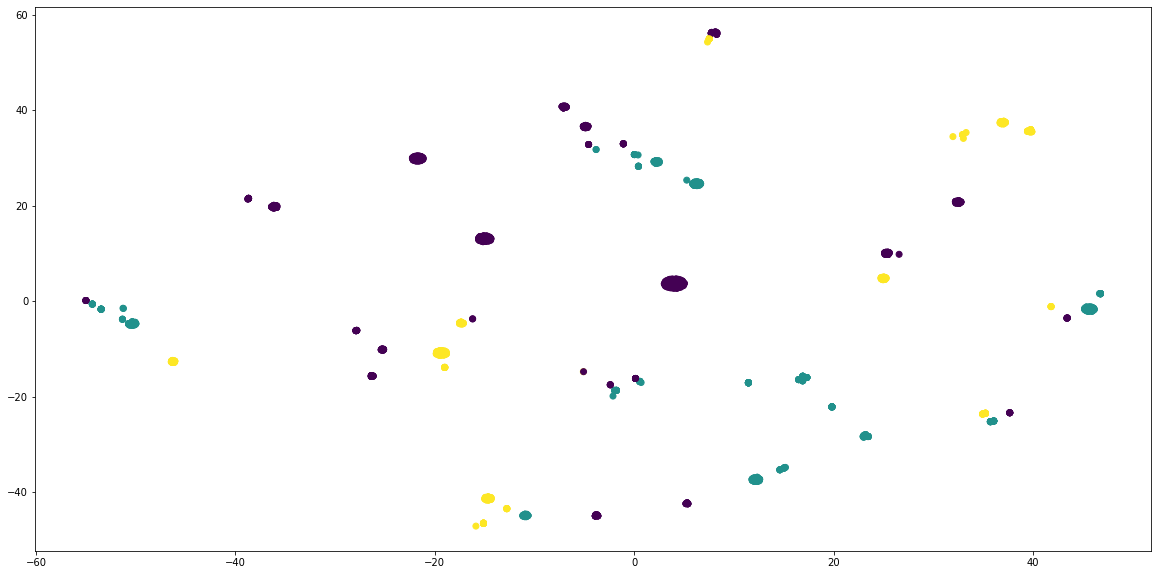

In [10]:
# так как признаков много (многомерное пространство),
# найдем его отображение в двумерном пространстве, чтобы визуально посмотреть, как расположены точки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE()
tsne_representation = tsne.fit_transform(X_scaled)

sepal_length = tsne_representation[:, 0]
sepal_width = tsne_representation[:, 1]
plt.scatter(sepal_length, sepal_width, c=Y)

In [5]:
# Применение алгоритма классификации с базовыми значениями параметров (заменить на свои)
model = SVC(kernel="linear", C=9)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print("Train: ", model.score(X_train, Y_train))
print("Test : ", model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.9432146294513956
Test :  0.9
              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         9

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20



### Зависимость результата от константы C и ядра

*Гиперпараметр регуляризации C* (от 0.001 до 1К). 

*Ядро*: линейное (linear), ядро RBF (rbf), полиномиальное (poly), сигмоидальное (sigmoid).

Так как в зависимости от ядер гиперпараметр может давать разные результаты и наоборот, переберем все возможные варианты, чтобы найти лучшую связку.

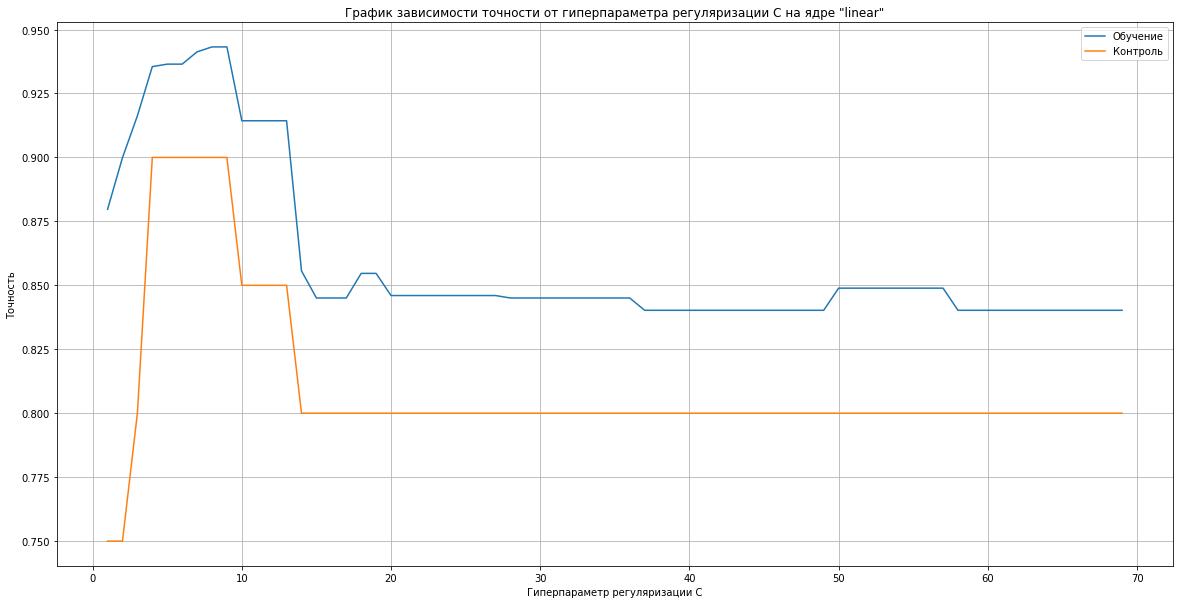

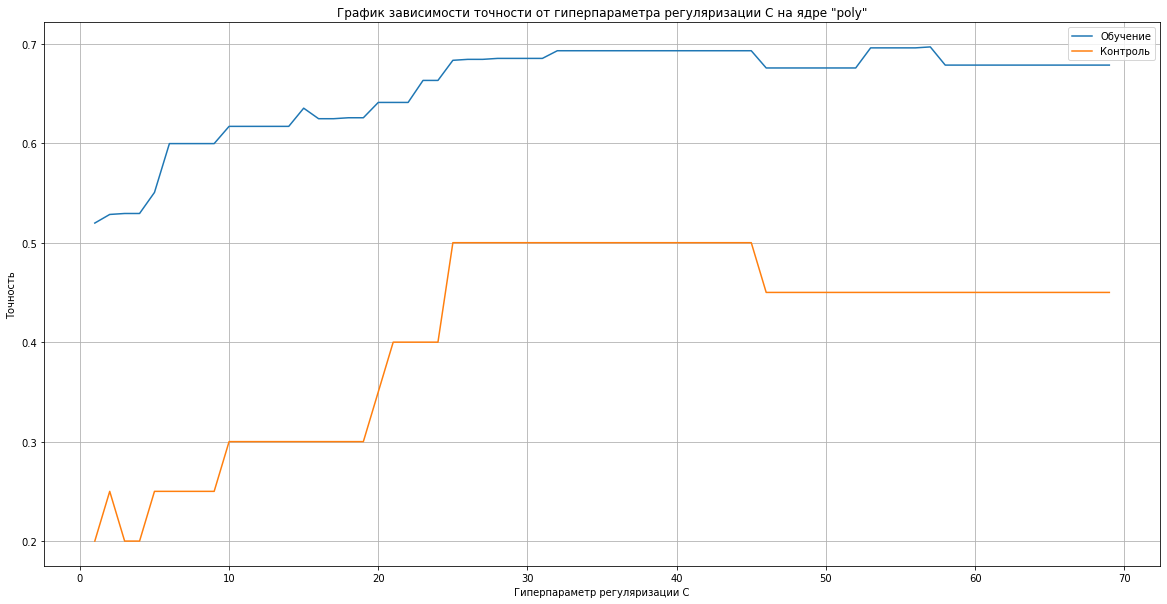

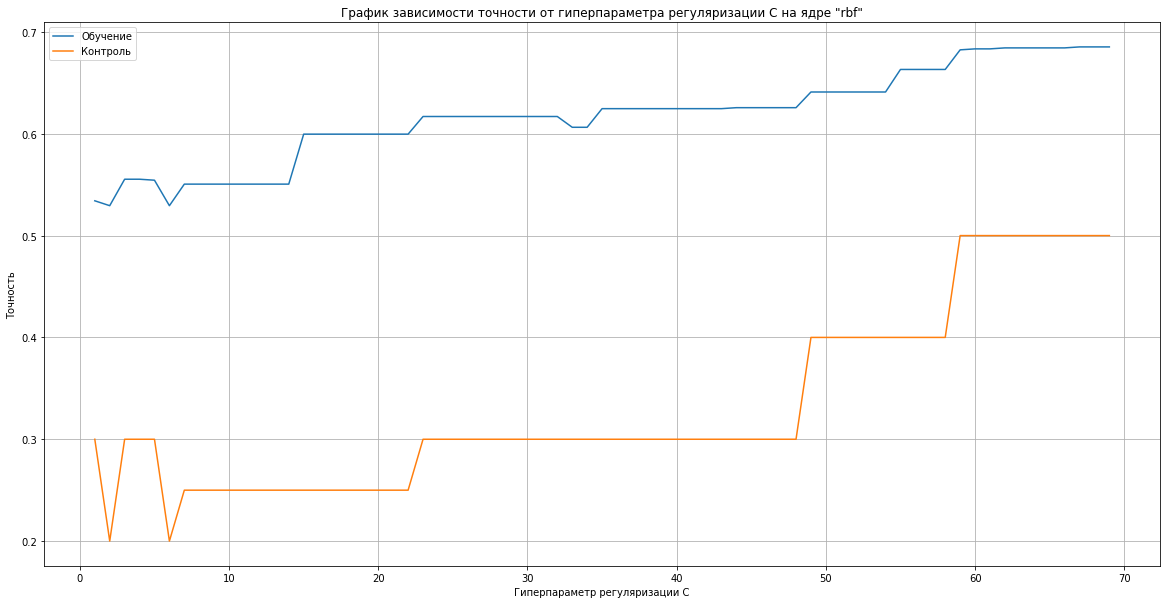

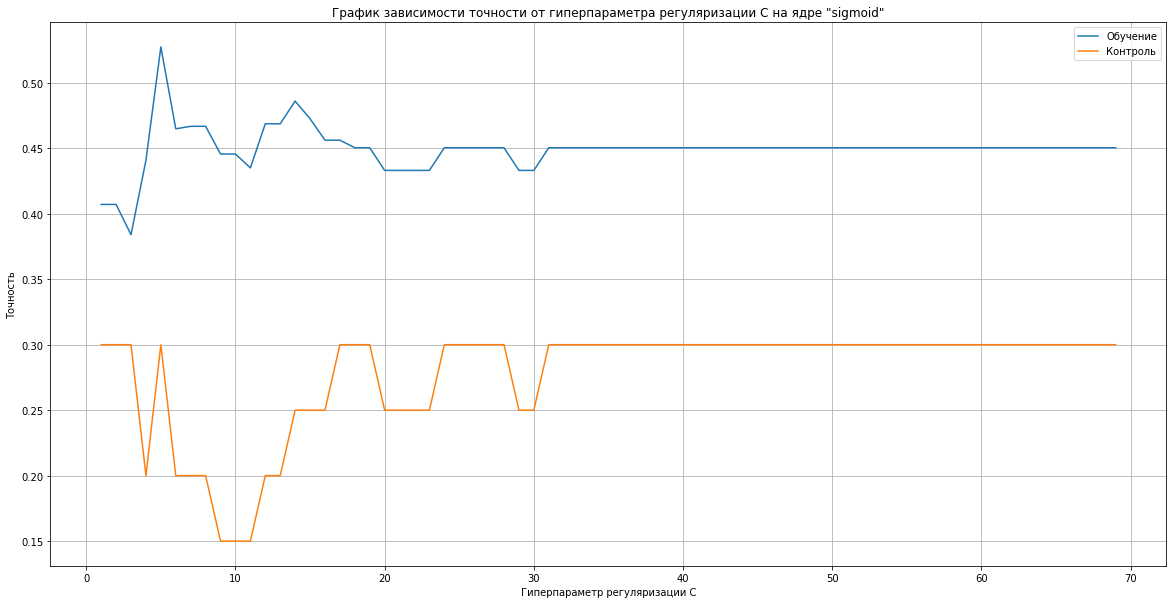

In [11]:
kernels = ("linear", "poly", "rbf", "sigmoid")
C_values = list(range(1, 70))
for local_kernel in kernels:
    models = []
    scores_train = []
    scores_test = []
    for local_C in C_values:
        model = SVC(kernel=local_kernel, C=local_C)
        model.fit(X_train, Y_train)
        models.append(model)
        scores_test.append(model.score(X_test, Y_test))
        scores_train.append(model.score(X_train, Y_train))

    plt.plot(C_values, scores_train, label="Обучение")
    plt.plot(C_values, scores_test, label="Контроль")
    plt.title(
        f'График зависимости точности от гиперпараметра регуляризации С на ядре "{local_kernel}"'
    )
    plt.xlabel("Гиперпараметр регуляризации C")
    plt.ylabel("Точность")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

Лучшее значение константы C = 9 на ядре "linear". Соответственно и лучшим ядром является "linear"

Качество на обучающей выборке: 0.94

Качество на контрольной выборке: 0.9

## Метод стохастического градиента (SG)


**Задание на дополнительный балл**.

Самостоятельно найти реализацию и исследовать свою выборку данных.

Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Линейный классификатор и стохастический градиент](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9B.D0.B8.D0.BD.D0.B5.D0.B9.D0.BD.D1.8B.D0.B9_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.82.D0.BE.D1.80_.D0.B8_.D1.81.D1.82.D0.BE.D1.85.D0.B0.D1.81.D1.82.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B9_.D0.B3.D1.80.D0.B0.D0.B4.D0.B8.D0.B5.D0.BD.D1.82)

In [7]:
model = SGDClassifier(
    loss="log", penalty="l2", max_iter=1000, shuffle=False, random_state=None
)

model.fit(X_train, Y_train)

print("Точность на обучении: ", model.score(X_train, Y_train))
print("Точность на контроле: ", model.score(X_test, Y_test))

ypred = model.predict(X_test)

print(classification_report(Y_test, ypred))

Точность на обучении:  0.5389797882579404
Точность на контроле:  0.3
              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.26      1.00      0.42         5
           3       0.00      0.00      0.00         9

    accuracy                           0.30        20
   macro avg       0.42      0.39      0.23        20
weighted avg       0.37      0.30      0.19        20



### Зависимость результата от функции потерь и штрафа

In [8]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
penalties = ["l2", "l1", "elasticnet", "none"]
best_loss = ""
best_penalty = ""
best_score_test = 0
best_score_train = 0
for loss in losses:
    print(f'Функция потерь "{loss}"')
    for penalty in penalties:
        model = SGDClassifier(
            loss=loss, penalty=penalty, max_iter=1000, shuffle=False, random_state=0
        )
        model.fit(X_train, Y_train)

        score_train = model.score(X_train, Y_train)
        score_test = model.score(X_test, Y_test)
        if score_test > best_score_test:
            best_loss, best_penalty, best_score_train, best_score_test = (
                loss,
                penalty,
                score_train,
                score_test,
            )
        print(f'\tШтраф "{penalty}"')
        print("\t\tТочность на обучении: ", score_train)
        print("\t\tТочность на контроле: ", score_test)
print(f'Лучшая функция потерь "{best_loss}"')
print(f'Лучший штраф "{best_penalty}"')
print(f"Лучшая точность на обучении: {best_score_train}")
print(f"Лучшая точность на контроле: {best_score_test}")

Функция потерь "hinge"
	Штраф "l2"
		Точность на обучении:  0.6920115495668913
		Точность на контроле:  0.65
	Штраф "l1"
		Точность на обучении:  0.7362848893166506
		Точность на контроле:  0.7
	Штраф "elasticnet"
		Точность на обучении:  0.6535129932627527
		Точность на контроле:  0.6
	Штраф "none"
		Точность на обучении:  0.6660250240615977
		Точность на контроле:  0.5
Функция потерь "log"
	Штраф "l2"
		Точность на обучении:  0.5389797882579404
		Точность на контроле:  0.3
	Штраф "l1"
		Точность на обучении:  0.6814244465832531
		Точность на контроле:  0.6
	Штраф "elasticnet"
		Точность на обучении:  0.629451395572666
		Точность на контроле:  0.35
	Штраф "none"
		Точность на обучении:  0.6044273339749759
		Точность на контроле:  0.4
Функция потерь "modified_huber"
	Штраф "l2"
		Точность на обучении:  0.6371511068334937
		Точность на контроле:  0.65
	Штраф "l1"
		Точность на обучении:  0.6390760346487007
		Точность на контроле:  0.45
	Штраф "elasticnet"
		Точность на обучении:  0.6583

---


# Заключение

## 1. Метод опорных векторов (SVM)

* Лучшее значение константы C = 8
* Лучшим ядром является linear
* Качество на обучающей выборке: 0.94
* Качество на контрольной выборке: 0.9

## 2. Метод стохастического градиента (SG)

* Лучшее значение функции потерь: hinge
* Лучшее значение штрафа: l1
* Качество на обучающей выборке: 0.736
* Качество на контрольной выборке: 0.7

## 3. Вывод

Лучший результат продемонстрировал метод SVM (метод опорных векторов), точность выше на ~20%. При работе с методом стохастического градиента, я не трогал параметры shuffle и random_state, так как если их менять, результат будет отличаться при каждом запуске.
